In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/creditcardfraud/creditcard.csv


In [2]:
!conda install -c anaconda py-xgboost

Retrieving notices: ...working... done
Channels:
 - anaconda
 - rapidsai
 - nvidia
 - conda-forge
 - defaults
 - file:///tmp/conda
Platform: linux-64

UnavailableInvalidChannel: HTTP 404 UNAVAILABLE OR INVALID for channel conda <file:///tmp/conda>

The channel is not accessible or is invalid.

You will need to adjust your conda configuration to proceed.
Use `conda config --show channels` to view your configuration's current state,
and use `conda config --show-sources` to view config file locations.

As of conda 4.3, a valid channel must contain a `noarch/repodata.json` and
associated `noarch/repodata.json.bz2` file, even if `noarch/repodata.json` is
empty. Use `conda index /tmp/conda`, or create `noarch/repodata.json`
and associated `noarch/repodata.json.bz2`.




TODO
- Original Dataset
- Undersampling
- Oversampling
- Comparing

In [79]:
import timeit
import matplotlib.pyplot as plt
from xgboost import XGBClassifier, DMatrix
import seaborn as sns
from sklearn import svm
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,auc,precision_score, recall_score, f1_score, roc_auc_score, roc_curve, average_precision_score

In [4]:
import xgboost as xbg

In [5]:
df = pd.read_csv("/kaggle/input/creditcardfraud/creditcard.csv")

In [6]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [8]:
df["Class"].unique()

array([0, 1])

**What is the mean of Vs and amount feature?**
Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.


And this is a unbalanced data, we should consider that.

In unbalance data can cause biased predictions. Because we have very few examples of one of the classes.


**My Idea:**
We don't know features name so we should find out which one is important for dataset and have affect on target variable etc.

**Understand the Data:**

Begin by thoroughly understanding the characteristics of your dataset. Identify the classes, the distribution of instances across classes, and any potential challenges associated with class imbalance.

In [9]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

We know that we have a imbalanced dataset but let's say we don't have this information. We should check it out.

In [10]:
print("Percentage of No Frauds:", round(df["Class"].value_counts()[0] / len(df)*100, 2))
print("Percentage of Frauds:", round(df["Class"].value_counts()[1]/ len(df)*100, 2))

Percentage of No Frauds: 99.83
Percentage of Frauds: 0.17


Let's visualize this to see imbalance dataset more clear. It would be better to use count plot to see the imbalance.

Text(0.5, 1.0, 'Distribution of Frauds(0: No Fraud || 1: Fraud)')

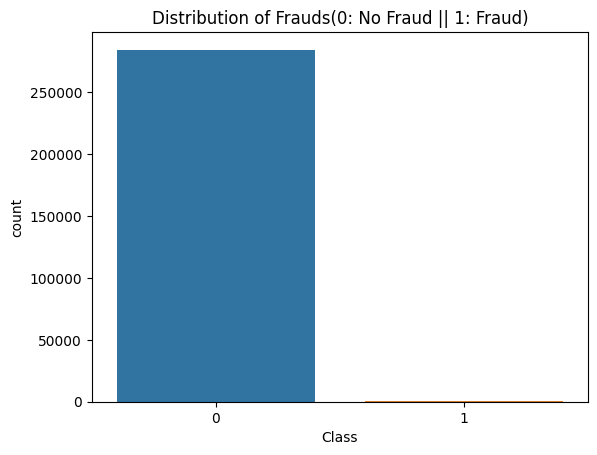

In [11]:
fig = sns.countplot(df, x=df["Class"])
fig.set_title("Distribution of Frauds(0: No Fraud || 1: Fraud)")

Let's see distribution of features that we know.

In [12]:
print("Max value of Amount:",df["Amount"].max())
print("Min value of Amount:",df["Amount"].min())

Max value of Amount: 25691.16
Min value of Amount: 0.0


In [13]:
df["Amount"].describe()

count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64

<Axes: xlabel='Amount', ylabel='Count'>

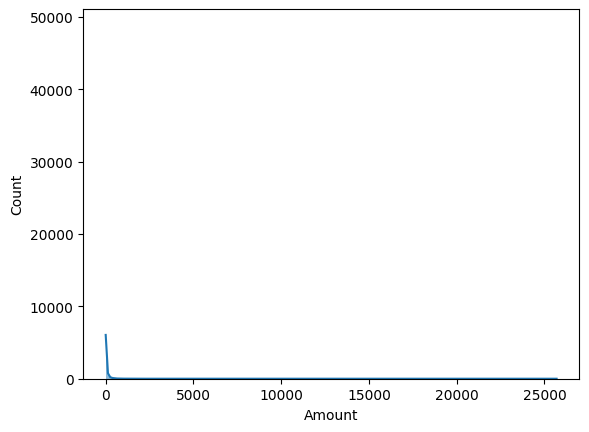

In [14]:
sns.histplot(data=df, x=df["Amount"], kde=True)

Text(0.5, 1.0, 'Distribution of Transaction Time')

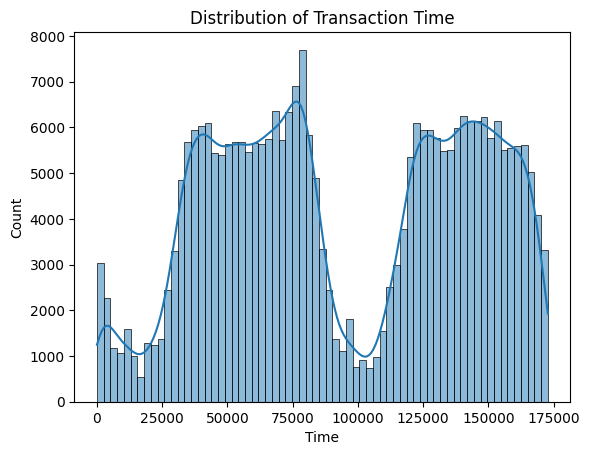

In [15]:
ax = sns.histplot(data=df, x=df["Time"], kde=True)
ax.set_title("Distribution of Transaction Time")

In [16]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


<Axes: xlabel='Amount'>

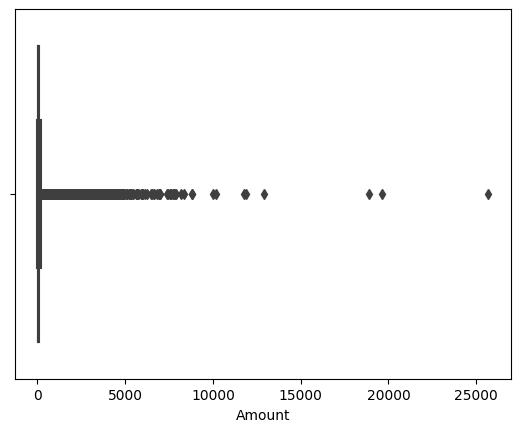

In [17]:
sns.boxplot(x = df["Amount"])

<Axes: xlabel='Time'>

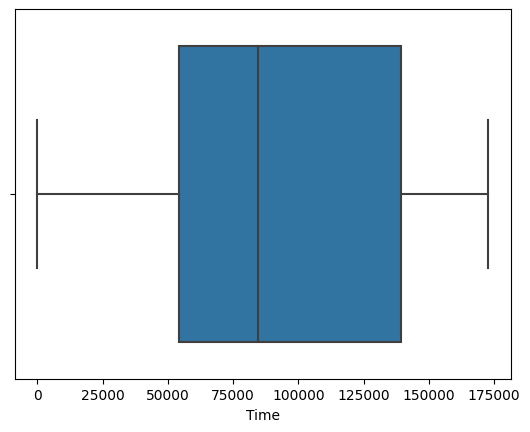

In [18]:
sns.boxplot(x = df["Time"])

All features(other than time and amount) are scaled so for training we should scale time and amount features.

Before implementing any balancing technique, train models on the imbalanced dataset to establish a baseline. This helps you understand the initial performance and the areas that need improvement.

**SCALING WHOLE DATASET**

When you have outliers in your data, the choice of scaling method can have an impact on the performance of your machine learning models. Scaling is important because many machine learning algorithms are sensitive to the scale of the input features. Outliers can significantly affect the mean and standard deviation, which are commonly used in scaling techniques. Here are a few scaling methods and considerations when dealing with outliers:

Standardization (Z-score normalization):

Standardizing scales the data to have a mean of 0 and a standard deviation of 1.
It is sensitive to outliers since the mean and standard deviation are affected by extreme values.
MinMax Scaling:

MinMax scaling scales the data to a specific range (e.g., [0, 1]).
Outliers can affect the scaling, especially if they are far from the median.
Robust Scaling:

Robust scaling is less sensitive to outliers because it uses the median and the interquartile range (IQR) instead of the mean and standard deviation.

We will use robust scaling because it is less sensitive to outliers and we are doing a experiment so, it will not change anything for dataset (dropping dataset etc.)

Robust scaling doesn't necessarily constrain the scaled values to a specific range like [0, 1]. Instead, it uses the median and interquartile range (IQR) to center and scale the data.

standardization does not constrain the data values to a specific range like [0, 1]. Standardization (Z-score normalization) transforms the data so that it has a mean of 0 and a standard deviation of 1, but the resulting values can be any real number. The scaled values are not constrained to a specific range. If you need to scale your data to a specific range like [0, 1], you might want to consider using Min-Max scaling (MinMaxScaler in scikit-learn), which linearly scales the data to the specified range.

In [19]:
len(df["Amount"])

284807

In [20]:
len(df["Amount"].values.reshape(-1, 1))

284807

In [21]:
df["Amount"].values.reshape(-1, 1)

array([[149.62],
       [  2.69],
       [378.66],
       ...,
       [ 67.88],
       [ 10.  ],
       [217.  ]])

**SCALING ORIGINAL DATASET**

In [22]:
robust_scale = RobustScaler()
df["Amount"] = robust_scale.fit_transform(df["Amount"].values.reshape(-1, 1))
df["Time"] = robust_scale.fit_transform(df["Time"].values.reshape(-1, 1))

In [23]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,1.783274,0
1,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.269825,0
2,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,4.983721,0
3,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,1.418291,0
4,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.670579,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,1.034951,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,-0.296653,0
284803,1.034963,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,0.038986,0
284804,1.034975,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,0.641096,0
284805,1.034975,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,-0.167680,0


**CREATING NEW DATASET WITH UNDERSAMPLING**

In [24]:
df_fraud = df.loc[df['Class']==1]
df_NonFraud = df.loc[df['Class']==0][:492]
df_NonFraud

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,1.783274,0
1,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.269825,0
2,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,4.983721,0
3,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,1.418291,0
4,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.670579,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
487,-0.990789,-0.711928,1.547423,1.799759,2.489060,0.450497,1.073762,0.309374,0.450854,-1.560107,...,-0.115133,-0.136653,0.052595,-0.327937,-0.531480,0.005533,0.515896,0.250372,-0.296933,0
488,-0.990778,1.106251,0.398625,0.860421,2.388862,-0.365843,-0.192568,-0.121769,0.150876,-0.733271,...,-0.253189,-0.952836,0.181643,0.222462,0.083552,-0.342278,-0.017021,0.020976,-0.063858,0
489,-0.990778,-0.424666,0.554293,1.374234,-0.447451,0.288248,-1.082536,0.969035,-0.347446,-0.109678,...,-0.023296,0.103502,0.024513,0.425008,-0.227746,0.182264,0.076720,-0.098667,0.274436,0
490,-0.990766,1.261597,0.256346,0.513254,0.619054,-0.472482,-0.989342,0.065431,-0.208781,0.035924,...,-0.257305,-0.739810,0.135646,0.376418,0.220320,0.094706,-0.028559,0.019023,-0.289387,0


In [25]:
df_undersample = pd.concat([df_fraud, df_NonFraud],ignore_index=True)
df_undersample

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-0.990214,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,-0.307413,1
1,-0.989438,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,7.084469,1
2,-0.942563,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,3.045204,1
3,-0.912910,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,0.517013,1
4,-0.906648,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,-0.293440,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
979,-0.990789,-0.711928,1.547423,1.799759,2.489060,0.450497,1.073762,0.309374,0.450854,-1.560107,...,-0.115133,-0.136653,0.052595,-0.327937,-0.531480,0.005533,0.515896,0.250372,-0.296933,0
980,-0.990778,1.106251,0.398625,0.860421,2.388862,-0.365843,-0.192568,-0.121769,0.150876,-0.733271,...,-0.253189,-0.952836,0.181643,0.222462,0.083552,-0.342278,-0.017021,0.020976,-0.063858,0
981,-0.990778,-0.424666,0.554293,1.374234,-0.447451,0.288248,-1.082536,0.969035,-0.347446,-0.109678,...,-0.023296,0.103502,0.024513,0.425008,-0.227746,0.182264,0.076720,-0.098667,0.274436,0
982,-0.990766,1.261597,0.256346,0.513254,0.619054,-0.472482,-0.989342,0.065431,-0.208781,0.035924,...,-0.257305,-0.739810,0.135646,0.376418,0.220320,0.094706,-0.028559,0.019023,-0.289387,0


In [26]:
df_undersample = df_undersample.sample(frac=1).reset_index(drop=True)
df_undersample

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-0.895699,0.314597,2.660670,-5.920037,4.522500,-2.315027,-2.278352,-4.684054,1.202270,-0.694696,...,0.743314,0.064038,0.677842,0.083008,-1.911034,0.322188,0.620867,0.185030,-0.293440,1
1,-0.992834,0.726749,-0.528042,0.050366,1.373621,-0.124122,0.415688,0.259555,0.085114,-0.003025,...,0.061888,-0.101838,-0.308373,-0.270673,0.604410,-0.333689,-0.003944,0.040685,2.836163,0
2,0.672388,0.120301,1.974141,-0.434087,5.390793,1.289684,0.280590,0.221963,0.067827,-1.387054,...,-0.038690,0.204554,-0.167313,0.791547,-0.223675,0.473223,-0.160202,0.065039,-0.296793,1
3,-0.994702,1.237429,0.061043,0.380526,0.761564,-0.359771,-0.494084,0.006494,-0.133862,0.438810,...,-0.245682,-0.530900,-0.044265,0.079168,0.509136,0.288858,-0.022705,0.011836,-0.065954,0
4,0.744381,1.261324,2.726800,-5.435019,5.342759,1.447043,-1.442584,-0.898702,0.123062,-2.748496,...,0.209086,-0.425938,-0.154440,-0.018820,0.632234,0.192922,0.468181,0.280486,-0.285195,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
979,-0.991318,0.230981,-2.000483,0.555155,0.600646,-1.551024,0.242333,-0.133183,0.105984,1.248546,...,0.079669,-0.610378,-0.309129,0.167024,-0.137728,0.922421,-0.113353,0.093969,6.587578,0
980,-0.261105,-5.344665,-0.285760,-3.835616,5.337048,-7.609909,3.874668,1.289630,0.201742,-3.003532,...,0.276011,1.342045,-1.016579,-0.071361,-0.335869,0.441044,1.520613,-1.115937,19.285405,1
981,-0.293977,0.326007,1.286638,-2.007181,2.419675,-1.532902,-1.432803,-2.459530,0.617738,-1.125861,...,0.556895,0.169776,-0.174357,0.308061,0.710996,-0.231030,0.580495,0.300984,-0.219800,1
982,-0.675584,-24.590245,14.044567,-26.278701,6.320089,-18.224513,-4.609968,-17.681003,16.213627,-3.794093,...,1.777063,-1.804874,-1.140605,0.152234,1.715997,-0.220471,1.434951,0.422492,1.089779,1


TRAINING UNDER SAMPLE DATA

Logistic regression is widely used in various fields, including medicine, finance, and machine learning, for tasks such as predicting whether an email is spam or not, predicting whether a patient has a particular medical condition, and many other binary classification problems.

- LR
- XGboost
- SVM

**HEATMAP**

Text(0.5, 1.0, 'Correlation Matrix for UNDERSAMPLE Data')

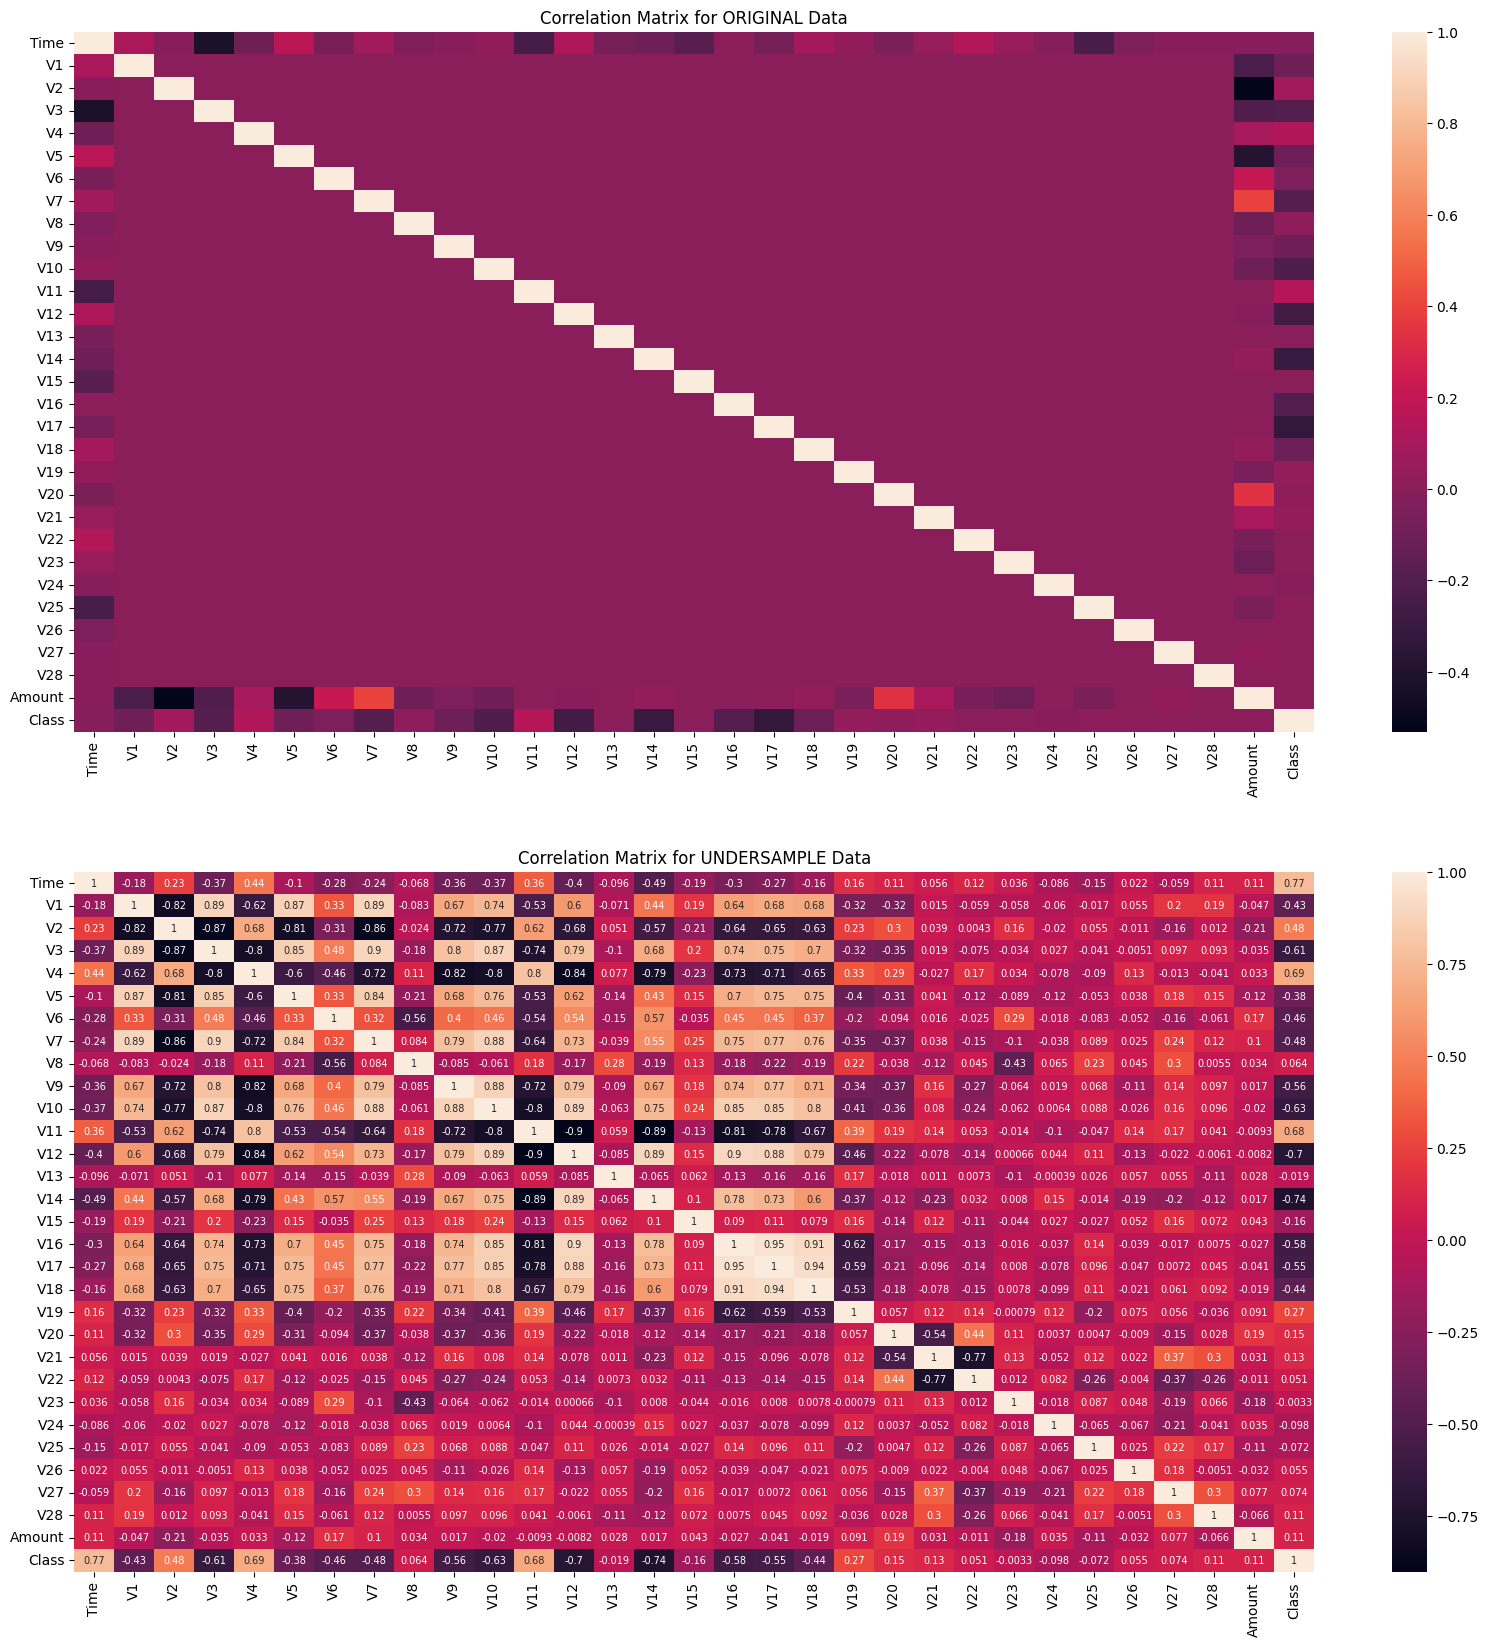

In [27]:
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(20,20))
corr = df.corr()
corr2 = df_undersample.corr()
sns.heatmap(corr, ax=ax1)
ax1.set_title("Correlation Matrix for ORIGINAL Data")
sns.heatmap(corr2, ax=ax2, annot_kws={'size':7},annot=True)
ax2.set_title("Correlation Matrix for UNDERSAMPLE Data")


if correlation between two variable is negative, that means when a variable increase, other decrease. So this named as negative correlation or inverse relationship. A scatterplot is a useful visualization to understand an inverse relationship. 

In [28]:
def drawboxplot():
    fig, axes = plt.subplots(ncols=7, figsize=(35,5))
    y_axis = ["V3", "V9", "V10","V12","V14", "V16", "V17"]
    for i in range(len(y_axis)):
        sns.boxplot(x="Class", y=y_axis[i], data=df_undersample, ax=axes[i])
        axes[i].set_title(f"{y_axis[i]} vs Class Negative Colleration")
    

My execution time 0.19572467200003985


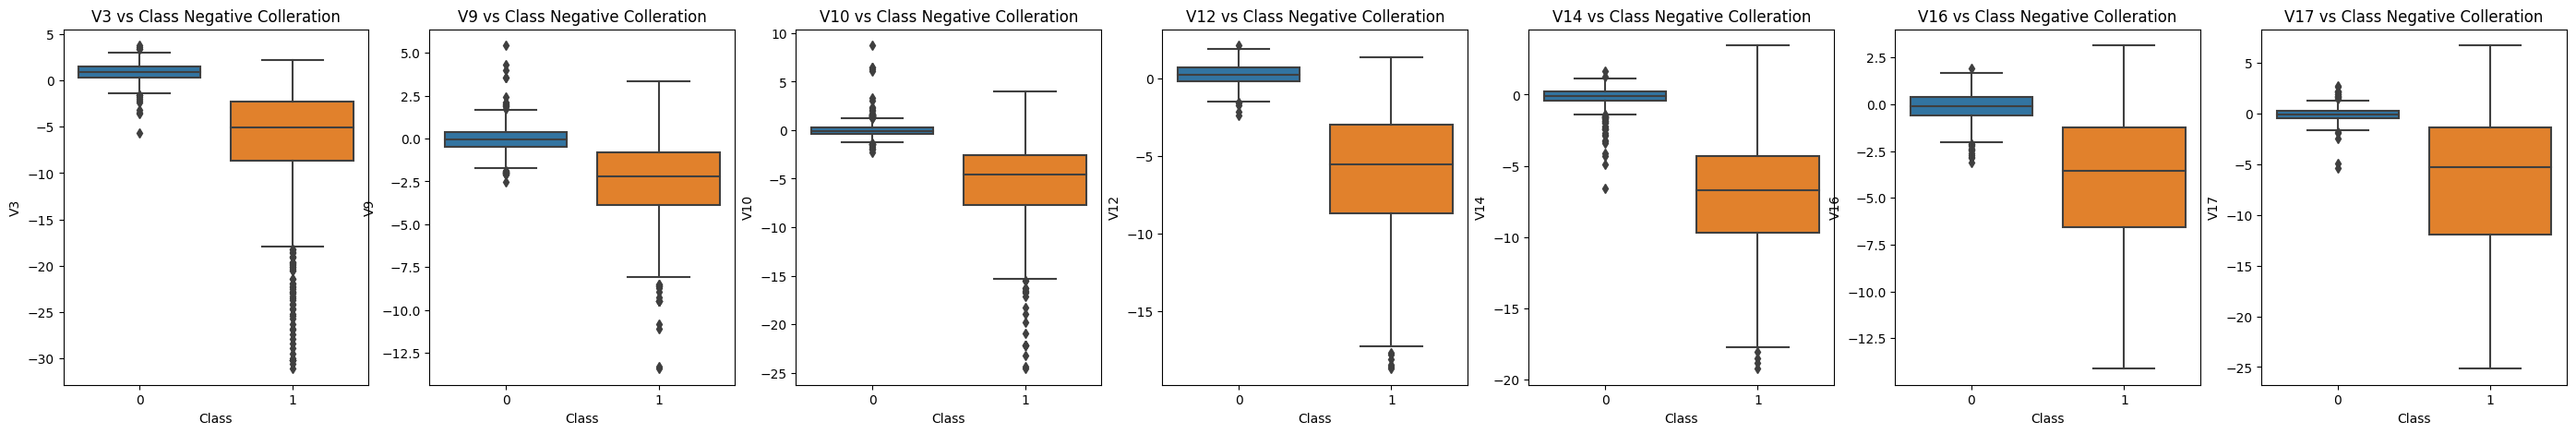

In [29]:
execution_time = timeit.timeit(drawboxplot, number=1)
print("My execution time", execution_time)

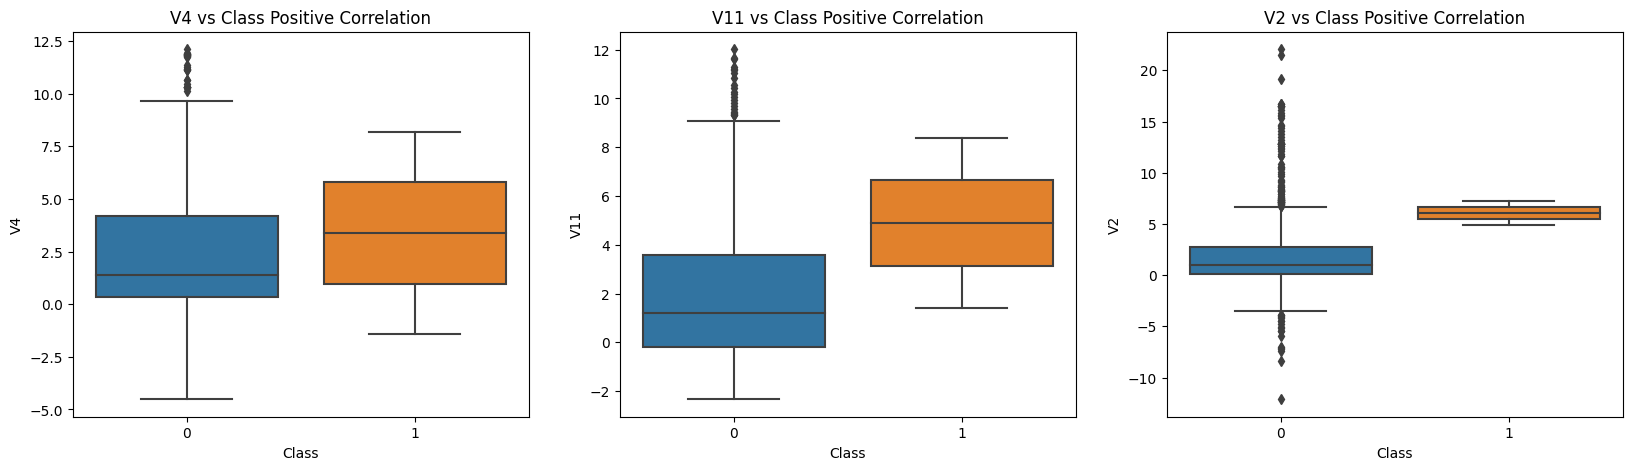

In [30]:
fig, axes = plt.subplots(ncols=3, figsize=(20,5))
y_axis = ["V4", "V11", "V2"]

for i in range(len(y_axis)):
    sns.boxplot(x=df["Class"], y=y_axis[i], data=df_undersample, ax=axes[i])
    axes[i].set_title(f"{y_axis[i]} vs Class Positive Correlation")

**SPLIT DATA TO TRAIN AND TEST SET**

We will have two sampled data, one for under sampling another for over sampling. With training, we will see which one is better for our dataset.

![](https://miro.medium.com/v2/resize:fit:1400/format:webp/0*FeIp1t4uEcW5LmSM.png)

**TRAINING ORGINAL SCALED DATASET**

In [31]:
X = df.drop('Class', axis=1)
Y = df["Class"]

In [32]:
X_train, Y_train, X_test, Y_test = train_test_split(X, Y, test_size=0.2,random_state=42)

In [33]:
X_undersample = df_undersample.drop('Class', axis=1)
Y_undersample = df_undersample["Class"]

In [34]:
X_undersample

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-0.895699,0.314597,2.660670,-5.920037,4.522500,-2.315027,-2.278352,-4.684054,1.202270,-0.694696,...,0.562706,0.743314,0.064038,0.677842,0.083008,-1.911034,0.322188,0.620867,0.185030,-0.293440
1,-0.992834,0.726749,-0.528042,0.050366,1.373621,-0.124122,0.415688,0.259555,0.085114,-0.003025,...,0.285749,0.061888,-0.101838,-0.308373,-0.270673,0.604410,-0.333689,-0.003944,0.040685,2.836163
2,0.672388,0.120301,1.974141,-0.434087,5.390793,1.289684,0.280590,0.221963,0.067827,-1.387054,...,0.205691,-0.038690,0.204554,-0.167313,0.791547,-0.223675,0.473223,-0.160202,0.065039,-0.296793
3,-0.994702,1.237429,0.061043,0.380526,0.761564,-0.359771,-0.494084,0.006494,-0.133862,0.438810,...,-0.066351,-0.245682,-0.530900,-0.044265,0.079168,0.509136,0.288858,-0.022705,0.011836,-0.065954
4,0.744381,1.261324,2.726800,-5.435019,5.342759,1.447043,-1.442584,-0.898702,0.123062,-2.748496,...,0.313332,0.209086,-0.425938,-0.154440,-0.018820,0.632234,0.192922,0.468181,0.280486,-0.285195
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
979,-0.991318,0.230981,-2.000483,0.555155,0.600646,-1.551024,0.242333,-0.133183,0.105984,1.248546,...,0.834179,0.079669,-0.610378,-0.309129,0.167024,-0.137728,0.922421,-0.113353,0.093969,6.587578
980,-0.261105,-5.344665,-0.285760,-3.835616,5.337048,-7.609909,3.874668,1.289630,0.201742,-3.003532,...,-1.562162,0.276011,1.342045,-1.016579,-0.071361,-0.335869,0.441044,1.520613,-1.115937,19.285405
981,-0.293977,0.326007,1.286638,-2.007181,2.419675,-1.532902,-1.432803,-2.459530,0.617738,-1.125861,...,0.222667,0.556895,0.169776,-0.174357,0.308061,0.710996,-0.231030,0.580495,0.300984,-0.219800
982,-0.675584,-24.590245,14.044567,-26.278701,6.320089,-18.224513,-4.609968,-17.681003,16.213627,-3.794093,...,1.649202,1.777063,-1.804874,-1.140605,0.152234,1.715997,-0.220471,1.434951,0.422492,1.089779


In [35]:
X_usTrain, X_usTest,Y_usTrain, Y_usTest = train_test_split(X_undersample, Y_undersample, test_size=0.2, random_state=42)


OUTLIERS AND ANOMALY DETECTION

Detecting outliers and performing anomaly detection are crucial steps in identifying potential fraud in a dataset.

I will try visualization, scores and algorithms

Outliers:

Definition: Outliers are data points that are significantly different from the majority of the data.
Characteristics: Outliers can be extreme values in a univariate or multivariate distribution. They might be due to errors, natural variations, or legitimate but rare occurrences.
Detection Methods: Outliers can be identified using statistical methods like z-scores or the interquartile range (IQR), visualization techniques such as box plots or scatter plots, or machine learning models.

Anomalies:

Definition: Anomalies, like outliers, refer to data points that deviate from the expected patterns, but they are often considered more broadly.
Characteristics: Anomalies can include outliers, but they may also encompass unexpected patterns, rare events, or behaviors that are not conforming to the norm. Anomalies can be contextual and may require a more sophisticated analysis to detect.
Detection Methods: Anomaly detection methods, such as Isolation Forests, One-Class SVM, or Autoencoders, are designed to identify deviations from normal patterns in a dataset. These methods can capture both outliers and more complex anomalies.

Z-Score:

The z-score measures how many standard deviations a data point is from the mean. A high z-score (either positive or negative) suggests that a data point is far from the mean and may be considered an outlier.
The formula for the z-score is: 
X-mean / standard deviation

 Logistic regression is a statistical method used for binary classification, which means it's employed when the dependent variable (or outcome) is categorical and has only two possible outcomes, typically coded as 0 and 1. The logistic regression model estimates the probability that a given instance belongs to a particular category.

In [36]:
Y_usTrain

962    1
762    1
334    1
889    1
529    1
      ..
106    1
270    0
860    0
435    0
102    0
Name: Class, Length: 787, dtype: int64

In [37]:
model = LogisticRegression()
model.fit(X_usTrain, Y_usTrain)

LogisticRegression()

In [38]:
y_pred = model.predict(X_usTest)

In [39]:
y_pred

array([1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1])

In [40]:
accuracy = accuracy_score(Y_usTest, y_pred)
accuracy

0.9898477157360406

In [41]:
precision = precision_score(Y_usTest, y_pred)
precision

1.0

In [42]:
recall = recall_score(Y_usTest, y_pred)
recall

0.9789473684210527

In [43]:
f1_score = f1_score(Y_usTest, y_pred)
f1_score

0.9893617021276596

In [44]:
roc_auc = roc_auc_score(Y_usTest, model.predict_proba(X_usTest)[:,1])
roc_auc

0.9997936016511868

XGBoost

To use XGBoost for fraud detection, make sure to preprocess your data appropriately, handle any imbalance in the dataset (since fraud events are often rare), and perform hyperparameter tuning to achieve the best results. Additionally, consider using techniques such as cross-validation to obtain a reliable estimate of your model's performance

 It implements machine learning algorithms under the Gradient Boosting framework.

XGBoost(eXtreme Gradient Boosting), Gradient Boosting algoritmasının çeşitli düzenlemeler ile optimize edilmiş yüksek performanslı halidir.

Algortimanın en önemli özellikleri yüksek tahmin gücü elde edebilmesi, aşırı öğrenmenin önüne geçebilmesi, boş verileri yönetebilmesi ve bunları hızlı yapabilmesidir.

In [50]:
params = {
    'objective':'binary:logistic',
    'max_depth':4,
    'alpha':10,
    'learning_rate':1.0,
    'n_estimators':100
    
}
model = XGBClassifier(**params)
model.fit(X_usTrain, Y_usTrain)

XGBClassifier(alpha=10, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=1.0, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, ...)

In [46]:
y_predxgb = model.predict(X_usTest)
# Evaluate the model
accuracy = accuracy_score(Y_usTest, y_predxgb)
print(f"Accuracy: {accuracy}")


Accuracy: 1.0


XGBoost has many hyperparameters that can be tuned to optimize performance. You can perform hyperparameter tuning using techniques like grid search or randomized search

XGBoost provides a way to assess feature importance, which can be helpful for understanding the model's decisions:

CROSS_VALIDATION FOR XGBOOST

In [55]:
cv = [3,5,10]
for i in cv:
    cv_scores = cross_val_score(model, X_usTrain, Y_usTrain, cv=i, scoring = 'accuracy')
    print(f"for cv = {i}, score is : {cv_scores.mean()}")

for cv = 3, score is : 0.9961832061068702
for cv = 5, score is : 0.997452229299363
for cv = 10, score is : 0.9987341772151899


In [56]:
precision = precision_score(Y_usTest, y_predxgb)
print(f"precision score : {precision}")

precision score : 1.0


In [57]:
recall = recall_score(Y_usTest, y_predxgb)
print(f"recall score : {recall}")

recall score : 1.0


In [58]:
f1 = f1_score(Y_usTest, y_predxgb)
print(f"f1 score : {f1}")

f1 score : 1.0


ROC AUC SCORE

In [60]:
y_pred_prob = model.predict_proba(X_usTest)[:,1]
roc_auc = roc_auc_score(Y_usTest, y_pred_prob)
print(f"roc_auc score : {roc_auc}")

roc_auc score : 1.0


In [64]:
pr_av = average_precision_score(Y_usTest, y_pred_prob)
print(f"pr_av : {pr_av}")

pr_av : 1.0


In [73]:
Y_usTrain

962    1
762    1
334    1
889    1
529    1
      ..
106    1
270    0
860    0
435    0
102    0
Name: Class, Length: 787, dtype: int64

In [74]:
Y_usTest

613    1
451    0
731    0
436    1
275    0
      ..
292    0
209    1
506    1
49     0
717    1
Name: Class, Length: 197, dtype: int64

In [75]:
y_proba_train

array([[0.02519029, 0.9748097 ],
       [0.02519029, 0.9748097 ],
       [0.02519029, 0.9748097 ],
       ...,
       [0.97435766, 0.02564233],
       [0.97435766, 0.02564233],
       [0.97435766, 0.02564233]], dtype=float32)

In [76]:
y_pred_prob

array([0.9748097 , 0.02564233, 0.02564233, 0.9748097 , 0.02564233,
       0.9748097 , 0.02564233, 0.9748097 , 0.02564233, 0.02564233,
       0.02564233, 0.9748097 , 0.02564233, 0.9748097 , 0.9748097 ,
       0.9748097 , 0.9748097 , 0.02564233, 0.02564233, 0.02564233,
       0.9748097 , 0.9748097 , 0.9748097 , 0.02564233, 0.02564233,
       0.9748097 , 0.9748097 , 0.02564233, 0.9748097 , 0.9748097 ,
       0.02564233, 0.9748097 , 0.9748097 , 0.9748097 , 0.9748097 ,
       0.02564233, 0.9748097 , 0.9748097 , 0.02564233, 0.9748097 ,
       0.02564233, 0.02564233, 0.02564233, 0.02564233, 0.02564233,
       0.02564233, 0.9748097 , 0.02564233, 0.9748097 , 0.9748097 ,
       0.9748097 , 0.02564233, 0.02564233, 0.02564233, 0.02564233,
       0.9748097 , 0.9748097 , 0.02564233, 0.9748097 , 0.9748097 ,
       0.02564233, 0.9748097 , 0.02564233, 0.9748097 , 0.02564233,
       0.02564233, 0.02564233, 0.9748097 , 0.9748097 , 0.02564233,
       0.9748097 , 0.02564233, 0.02564233, 0.02564233, 0.02564

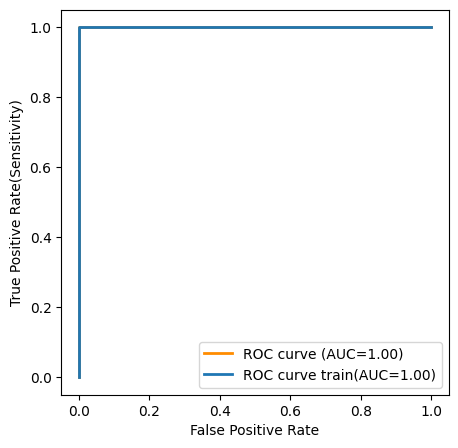

In [77]:
y_proba_train = model.predict_proba(X_usTrain)[:,1]
fpr_train, tpr_train, threshold_train = roc_curve(Y_usTrain, y_proba_train)
roc_auc_train = auc(fpr_train, tpr_train)
fpr, tpr, thresholds = roc_curve(Y_usTest,y_pred_prob)
roc_auc = auc(fpr,tpr)
plt.figure(figsize=(5,5))
plt.plot(fpr,tpr,color='darkorange', lw=2, label='ROC curve test(AUC={:.2f})'.format(roc_auc))
plt.plot(fpr_train, tpr_train,lw=2,label='ROC curve train(AUC={:.2f})'.format(roc_auc_train))
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate(Sensitivity)")
plt.legend(loc="lower right")
plt.show()

precision = precision_score(Y_usTest, predxgb)
print(f"precision :)

SVM FOR UNDERSAMPLE DATA

SVMs) are supervised machine learning algorithms used for classification and regression tasks.
The classifier separates data points using a hyperplane with the largest amount of margin. That's why an SVM classifier is also known as a discriminative classifier. SVM finds an optimal hyperplane which helps in classifying new data points.

The core idea of SVM is to find a maximum marginal hyperplane(MMH) that best divides the dataset into classes.
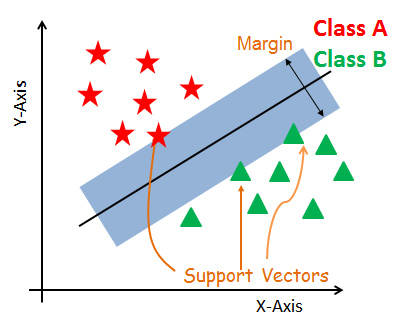]


SVM uses a technique called the kernel trick. Here, the kernel takes a low-dimensional input space and transforms it into a higher dimensional space. 
In other words, you can say that it converts nonseparable problem to separable problems by adding more dimension to it. It is most useful in non-linear separation problem. Kernel trick helps you to build a more accurate classifier

They also use less memory because they use a subset of training points in the decision phase. 
SVM is not suitable for large datasets because of its high training time and it also takes more time in training compared to Naïve Bayes. It works poorly with overlapping classes and is also sensitive to the type of kernel used.

In [80]:
svm_clf = svm.SVC(kernel='linear')
svm_clf.fit(X_usTrain, Y_usTrain)
y_pred = svm_clf.predict(X_usTest)
y_pred

array([1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1])

In [82]:
accuracy_svm = accuracy_score(y_pred, Y_usTest)
print(f"Accuracy for svm : {accuracy_svm}")
precision_svm = precision_score(y_pred, Y_usTest)
print(f"precision for svm : {precision_svm}")
recall_svm = recall_score(y_pred, Y_usTest)
print(f"recall for svm : {recall_svm}")

Accuracy for svm : 0.9949238578680203
precision for svm : 0.9894736842105263
recall for svm : 1.0


In [47]:
Q1 = np.percentile(X_usTrain, 25)
Q3 = np.percentile(X_usTrain, 75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers =X_usTrain.drop((X_usTrain.values< lower_bound) | (X_usTrain.values > upper_bound))
outliers

KeyError: '[(False, True, True, True, False, False, False, True, True, False, True, True, True, False, True, False, False, False, False, False, True, True, False, False, False, False, False, False, False, True), (False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, True, True, True, False, False, False, False, False, True, True, True, False, True, False, False, False, False, False, True, False, False, False, False, False, False, False, False, True), (False, True, True, True, False, False, False, True, False, False, True, True, True, False, True, False, True, True, False, False, False, False, False, False, False, False, False, False, False, False), (False, True, True, True, True, True, True, True, True, True, True, True, True, False, True, False, True, True, True, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, True, False, True, True, True, False, True, False, False, True, True, True, False, True, False, True, True, True, True, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False), (False, True, True, True, True, True, True, True, True, False, True, True, True, False, True, False, True, True, True, False, True, True, True, True, False, False, False, False, False, False), (False, True, True, True, True, True, True, True, True, True, True, True, True, False, True, False, True, True, True, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, True, True, True, False, False, False, False, False, True, True, True, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, False, False, False, False, True, True, True, False, True, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False), (False, True, False, True, True, True, False, True, False, True, True, True, True, False, True, False, True, True, True, True, False, False, False, False, False, False, False, False, False, True), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, True, True, False, False, False, False, False, False, False, False, False, True, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, True, True, True, True, False, True, False, False, True, False, True, False, True, False, True, True, True, True, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, True, True, True, True, True, False, True, True, True, True, True, True, False, True, False, True, True, True, False, False, False, False, False, False, False, False, False, False, True), (False, False, False, False, True, False, False, False, False, False, False, False, False, False, True, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, True, True, True, True, False, False, False, False, False, False, False, False, True, False, False, True, True, True, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, True, True, True, True, True, True, True, True, True, True, True, True, False, True, False, True, True, True, True, False, True, False, False, False, False, False, False, False, False), (False, True, True, True, True, True, False, False, False, True, True, True, True, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, True, True, True, True, False, False, True, False, False, True, True, True, False, True, False, True, True, True, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, True, False, False, False, False, False, True, True, True, False, True, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, True, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, True, True, False, True, True, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, True, True, True, False, False, True, False, True, True, True, True, False, True, False, True, True, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True), (False, False, False, False, True, False, False, False, False, False, True, True, False, False, True, False, True, True, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, True, True, True, False, False, False, False, True, True, True, True, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, True, True, True, True, True, True, True, False, False, True, False, False, False, True, False, True, True, False, False, True, False, False, False, False, False, False, False, False, True), (False, True, True, True, True, True, True, True, True, False, True, True, True, False, True, False, True, True, True, False, True, True, True, True, False, False, False, False, False, False), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False), (False, False, True, True, False, False, False, True, False, False, True, True, True, False, True, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, True, True, False, False, False, False, False, True, True, True, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, True, True, True, True, True, False, True, True, True, True, True, True, False, True, False, True, True, True, True, False, False, False, False, False, False, False, False, False, False), (False, False, False, True, False, False, False, True, False, False, True, True, True, False, True, False, True, True, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False), (False, False, False, True, True, False, False, False, False, False, True, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, True, True, True, True, True, False, True, True, True, True, True, True, True, True, False, True, True, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, True, True, True, True, True, False, True, True, True, True, True, True, False, True, False, True, True, True, False, True, True, True, False, False, False, False, True, False, False), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, True, True, True, True, True, True, True, True, True, True, True, True, False, True, False, True, True, True, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, True, False, False, False, False, False, False, True, True, True, False, True, False, False, True, True, False, False, False, False, False, False, False, False, False, False, False), (False, True, True, True, True, True, False, True, False, True, True, True, True, False, True, False, True, True, True, False, False, False, False, False, False, False, False, False, False, False), (False, True, True, True, True, False, False, True, True, False, False, True, True, False, True, False, False, True, False, False, False, True, False, False, False, False, False, False, False, False), (False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, True, True, True, True, True, True, True, True, True, True, True, True, False, True, False, True, True, True, False, False, True, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, True, True, True, True, False, False, False, False, False, True, False, False, True, False, True, True, True, False, False, False, False, False, False, False, False, False, False, False), (False, False, True, True, True, False, False, False, False, False, True, True, True, False, True, False, True, True, False, False, False, False, False, False, False, False, False, False, False, False), (False, True, True, True, True, True, True, True, True, True, True, True, True, False, True, True, True, True, True, False, True, True, True, True, False, False, False, True, False, False), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, True, True, True, False, False, True, False, False, True, True, True, False, True, True, True, True, True, False, False, False, False, False, False, False, False, False, False, False), (False, True, True, False, False, False, False, False, False, True, True, True, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, True, True, False, False, False, False, False, False, True, False, False, True, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False), (False, True, True, True, True, True, True, True, True, False, True, True, True, False, True, False, True, True, True, False, True, True, True, True, False, False, False, False, False, False), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, True, True, True, True, True, True, True, True, True, True, True, True, False, True, False, True, True, True, False, False, False, False, False, False, False, False, False, False, False), (False, True, True, True, True, True, False, True, False, True, True, True, True, False, True, False, True, True, True, False, False, False, False, False, False, False, False, True, False, False), (False, True, True, True, True, True, True, True, True, True, True, True, True, False, True, False, True, True, True, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, True, True, True, True, True, True, True, True, True, True, True, True, False, True, False, True, True, True, True, False, True, False, False, False, False, False, False, False, False), (False, True, True, True, True, True, True, True, True, True, True, True, True, False, True, False, True, True, True, True, False, False, False, False, False, False, False, False, False, True), (False, True, True, True, True, True, True, True, True, False, True, True, True, False, True, False, True, True, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, True, False, False, False, False, False, True, False, True, False, True, False, True, True, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, True, True, True, True, False, False, True, True, True, True, False, True, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, True, False, False, False, True, True, True, True, False, False, False, True, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False), (False, True, True, True, True, True, False, True, True, True, True, True, True, False, True, False, True, True, True, False, False, True, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, True, True, True, True, True, False, True, True, True, True, True, True, False, True, False, True, True, True, False, False, False, False, False, False, False, False, False, False, True), (False, True, True, True, True, True, True, True, False, True, True, True, True, False, True, False, True, True, True, True, False, False, False, False, False, False, False, False, False, False), (False, True, False, True, True, False, False, True, False, False, True, True, True, False, True, False, True, True, True, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, True, True, True, False, False, True, False, False, True, True, True, False, True, False, True, True, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, True, False, True, True, False, False, False, False, False, False, False, True, False, False, True, True, False, False, False, False, True, False, False, False, False, False, False), (False, True, False, True, False, False, False, True, False, False, True, True, True, False, True, False, True, True, True, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, True, True, True, True, False, False, True, False, False, False, True, True, False, True, False, True, True, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, True, True, True, True, True, True, True, True, True, True, True, True, False, True, False, True, True, True, False, False, True, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, True, True, False, False, False, False, False, False, True, True, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, True, True, False, False, False, False, False, True, True, True, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, True, True, True, True, True, True, True, True, True, True, True, True, False, True, False, True, True, True, True, False, True, False, False, False, False, False, False, False, False), (False, True, True, True, True, True, True, True, True, True, True, True, True, False, True, False, True, True, True, True, False, True, False, False, False, False, False, False, False, False), (False, True, True, True, True, False, True, True, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, True, False, False, False, False, False, True), (False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, True, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, True, True, True, True, False, False, False, False, True, True, True, False, True, False, True, True, False, True, False, False, False, False, False, False, False, False, False, True), (False, False, False, False, True, False, False, False, False, False, False, False, True, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False), (False, True, True, True, False, False, True, True, False, True, True, True, True, False, True, False, True, True, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, True, True, False, False, False, False, False, True, False, True, False, True, False, False, True, False, False, True, False, False, False, False, False, False, False, False, True), (False, True, True, True, True, True, True, True, True, True, True, True, True, False, True, False, True, True, True, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, True, True, True, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True), (False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, True, True, True, True, False, False, False, False, False, False, True, False, True, False, True, True, True, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, True, True, True, True, True, True, True, True, False, True, False, True, False, True, False, True, True, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, True, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, True, True, True, True, True, False, True, True, True, True, True, True, False, True, False, True, True, True, False, False, True, True, False, False, False, False, True, False, False), (False, False, False, False, False, False, False, False, False, False, False, False, True, False, True, False, True, True, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, True, True, False, False, True, False, False, True, True, True, False, True, False, True, True, False, False, False, False, False, False, False, False, False, False, False, True), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, True, True, True, True, True, False, True, False, True, True, True, True, False, True, False, True, True, True, True, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, True, True, True, True, True, True, True, True, True, True, True, True, False, True, False, True, True, True, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, True, True, False, False, False, False, True, True, True, False, True, False, True, True, False, True, False, False, False, False, False, False, False, False, False, True), (False, True, True, True, True, True, False, True, True, True, True, True, True, False, True, False, True, True, True, True, False, False, False, False, False, False, False, False, False, True), (False, False, False, False, True, False, False, True, False, False, False, False, True, False, True, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False), (False, True, False, True, True, True, False, True, False, True, True, True, True, False, True, False, True, True, True, False, False, False, False, False, False, False, False, False, False, False), (False, False, True, True, False, False, False, False, False, False, True, True, True, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, True, True, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, True), (False, False, True, False, True, False, False, False, False, False, True, False, True, False, True, False, True, True, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False), (False, True, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, True), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, True, True, True, True, False, False, True, True, True, True, True, True, False, True, False, False, True, False, False, True, True, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, False, False, False, False, False, True, False, False, True, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False), (False, True, True, True, True, True, False, True, True, True, True, True, True, False, True, False, True, True, True, True, False, False, False, False, False, False, False, True, False, False), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, True, False, False, False, False, False, False, True, True, True, False, True, False, True, True, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, True, True, True, False, False, False, False, False, True, False, True, False, True, False, True, True, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, True, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, False, False, False, False, True, True, False, False, True, False, True, True, False, False, False, False, False, False, False, False, False, False, False, True), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, True, False, True, True, False, True, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, True, True, True, False, False, False, False, False, True, True, True, False, True, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, True, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True), (False, False, True, True, True, False, False, True, False, True, True, True, True, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, True, False, False, False, False, False, False, True, True, True, False, True, False, True, True, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, True, False, True, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, True, True, False, True, True, True, True, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, True, True, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, True, False, True, False, False, False, False, False, False, True, True, True, False, True, False, True, True, False, False, False, False, False, False, False, False, False, False, False, False), (False, True, True, False, False, True, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, True, True, True, False, False, True, False, False, True, True, True, False, True, False, True, True, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, True), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, True, True, True, True, True, True, True, True, True, True, True, True, False, True, False, True, True, True, True, False, True, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, False, False, False, False, True, True, True, False, True, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, True, True, True, True, False, True, False, True, True, True, True, False, True, False, True, True, False, False, False, False, False, False, False, False, False, False, False, True), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, True, True, True, False, False, False, False, True, True, True, True, False, True, False, True, True, False, False, False, False, False, False, False, False, False, False, False, False), (False, True, True, True, True, True, True, True, True, True, True, True, True, False, False, True, True, True, True, False, True, True, True, True, False, False, False, True, False, False), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, True, True, True, True, False, False, True, False, False, True, True, True, False, True, False, True, True, False, True, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, True, False, True, False, False, False, False, True, False, False, False, False, False, False, True, False, False, False, False, False, True, False, False, False, False, False, False, False, False), (False, False, False, False, True, False, False, False, False, False, True, True, True, False, True, False, True, True, False, False, False, False, False, False, False, False, False, False, False, True), (False, False, False, True, True, False, False, True, False, False, True, True, True, False, True, False, True, True, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, True, True, True, True, True, True, True, True, True, True, True, True, False, True, False, True, True, True, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, True, False, False, False, False, True, True, False, False, True, False, True, True, False, True, False, False, False, False, False, False, False, False, False, True), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, True, False, False, False, False, False, False, True, True, False, True, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, True, True, True, False, False, False, False, True, True, True, True, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, True, True, False, False, False, False, False, False, True, True, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, True, False, False, False, False, False, False, True, False, True, False, True, False, True, True, True, False, False, False, False, False, False, False, False, False, False, False), (False, False, True, True, True, False, False, False, False, True, True, True, True, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, True, True, True, True, True, True, True, True, True, True, True, True, False, True, False, True, True, True, False, False, False, False, False, False, False, False, False, False, False), (False, True, False, True, True, False, False, True, False, False, True, True, True, False, True, False, True, True, False, False, False, False, False, False, False, False, False, False, False, True), (False, True, False, False, True, False, False, True, False, False, True, True, True, False, True, False, True, True, True, True, False, False, False, False, False, False, False, False, False, False), (False, True, True, False, False, False, False, False, True, False, False, True, True, False, True, False, True, True, False, False, False, False, False, False, False, False, False, True, False, False), (False, True, True, False, False, True, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, True, True, False, False, False, False, False, True, True, True, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, True, False, False, False, False, False, False, True, False, False, True, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False), (False, True, True, True, True, True, True, True, True, True, True, True, True, False, True, False, True, True, True, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, False, False, False, False, True, False, True, False, True, False, True, True, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, False, False, False, False, False, False, True, False, True, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, True, True, True, True, True, True, False, True, True, True, True, False, True, False, True, True, True, True, False, False, False, False, False, False, False, False, False, False), (False, False, True, True, True, False, False, True, False, True, True, True, True, False, True, False, True, True, True, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, True, True, False, False, False, False, True, False, True, False, False, False, True, True, False, False, False, False, False, False, False, False, False, False, False, True), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, True, False, True, True, False, False, False, False, False, True, True, True, False, True, False, True, True, False, False, False, False, False, False, False, False, False, False, False, True), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, True, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, True, False, False, False, False, False, True, False, True, False, True, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, True, True, True, True, True, False, True, True, False, True, True, True, True, True, False, True, True, True, False, False, False, False, False, False, False, False, False, False, False), (False, True, True, True, True, True, True, True, True, True, True, True, True, False, True, False, True, True, True, True, False, True, False, False, False, False, False, False, False, False), (False, False, True, True, True, False, True, False, False, True, True, True, True, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True), (False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True), (False, False, False, False, False, False, False, False, False, False, False, True, False, False, True, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, True, True, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, True), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, True, True, True, False, False, False, False, True, True, True, True, False, True, False, True, True, False, True, False, False, False, False, False, False, False, False, False, False), (False, False, True, False, False, False, False, True, True, True, False, False, False, False, False, False, False, True, False, False, False, True, False, False, False, False, False, False, False, False), (False, False, False, False, False, True, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True), (False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, True, True, True, True, False, False, True, False, False, True, True, True, False, True, False, True, True, True, False, False, False, False, False, False, False, False, False, False, False), (False, True, True, True, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True), (False, False, False, False, False, False, False, False, False, False, True, True, True, False, True, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, True, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, True, True, True, True, True, True, True, True, True, True, True, True, True, False, True, True, True, True, False, True, True, True, True, False, False, False, True, False, False), (False, True, True, True, True, True, False, True, True, True, True, True, True, False, True, False, True, True, True, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, True, True, False, False, False, False, False, True, False, True, False, True, False, True, False, False, False, False, False, False, False, False, False, False, False, False, True), (False, True, False, True, True, True, False, True, False, True, True, True, True, False, True, False, True, True, True, False, False, False, False, False, False, False, False, False, False, False), (False, False, True, True, True, False, True, False, False, False, True, True, True, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, True, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True), (False, False, True, True, True, False, False, False, False, True, True, True, True, False, True, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False), (False, True, True, True, True, True, True, True, True, True, True, True, True, False, True, False, True, True, True, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, False, False, False, False, False, False, True, False, True, False, True, True, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, True, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, True, True, True, True, True, True, True, False, True, True, True, True, False, True, False, True, True, True, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, True, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, True, True, False, True, False, False, True, False, True, True, True, True, False, True, False, True, True, True, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, False, True, True, False, True, False, True, False, True, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False), (False, True, False, True, False, False, True, True, True, False, True, True, True, False, True, False, True, True, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, True, True, True, False, False, False, False, True, True, True, True, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, True, True, True, True, True, False, True, True, True, True, True, True, False, True, False, True, True, True, False, True, True, True, False, False, False, False, True, False, False), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, True, True, True, True, False, False, True, False, False, False, False, True, False, True, False, True, True, True, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, True, False, False, False, False, True, False, True, False, True, False, False, True, True, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, True, False, False, False, False, False, False, True, True, False, True, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, True, True, False, False, False, False, False, True, True, True, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, True, True, True, True, True, False, True, True, True, True, True, True, False, True, False, True, True, True, False, False, True, False, False, False, False, False, True, False, False), (False, True, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, False, False, False, False, True, True, True, False, True, False, True, True, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, True, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, True, False, True, True, False, True, True, False, True, True, True, True, False, True, False, True, True, True, True, False, False, False, False, False, False, False, False, False, False), (False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, True, False, True, False, True, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True), (False, True, True, True, True, False, False, True, True, False, False, True, True, False, True, False, False, True, False, False, False, True, False, False, False, False, False, False, False, False), (False, False, True, True, True, False, False, False, False, False, True, True, True, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, True, True, True, True, True, True, True, True, True, True, True, True, False, True, False, True, True, True, True, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, True, True, True, True, True, True, True, True, True, True, True, True, False, True, False, True, True, True, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True), (False, False, False, False, False, False, False, False, False, False, True, True, True, False, True, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False), (False, True, True, True, True, True, True, True, True, True, True, True, True, False, True, False, True, True, True, False, False, False, False, False, False, False, False, False, False, False), (False, False, True, True, True, False, False, False, False, False, True, False, True, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, True, True, False, False, False, False, False, True, True, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, True, True, True, True, True, True, True, True, False, True, True, True, False, True, False, True, True, True, False, True, True, True, True, False, False, False, False, False, False), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, True, True, True, True, True, True, True, True, True, True, True, True, False, True, False, True, True, True, False, False, False, False, False, False, False, False, False, False, False), (False, True, True, True, True, True, False, True, True, True, True, True, True, False, True, False, True, True, True, True, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, True, True, True, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, True, False, True, False, False, False, False), (False, False, True, True, True, False, False, False, False, True, True, True, True, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True), (False, False, False, False, False, True, False, True, True, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False), (False, True, True, True, True, True, True, True, True, True, True, True, True, False, True, False, True, True, True, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, True, True, True, True, False, False, True, False, False, True, True, True, False, True, False, True, True, True, False, False, True, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, True, True, True, False, False, True, False, True, True, True, True, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, True, False, False, False, False, False, True, False, True, False, True, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False), (False, True, True, True, False, True, False, False, False, False, True, False, True, False, True, False, False, True, False, False, False, False, False, True, False, False, False, False, False, True), (False, False, False, True, False, False, False, False, False, False, True, False, True, False, True, False, True, True, False, False, False, False, False, False, False, False, False, False, False, False), (False, True, True, True, True, True, True, True, True, True, True, True, True, False, True, False, True, True, True, False, False, False, False, False, False, False, False, False, False, False), (False, False, True, True, True, False, True, False, False, False, True, True, True, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, True, True, True, True, True, True, True, True, True, True, True, True, False, True, False, True, True, True, False, False, False, False, False, False, False, False, False, False, False), (False, True, True, True, True, True, False, True, True, True, True, True, True, False, True, False, True, True, True, True, False, False, False, False, False, False, False, False, False, False), (False, True, True, True, True, True, True, True, True, True, True, True, True, False, True, False, True, True, True, True, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, True, True, True, True, True, False, True, True, True, True, True, True, False, True, False, True, True, True, False, True, True, True, False, False, False, False, True, False, False), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, True, True, True, True, True, False, True, True, True, True, True, True, False, True, False, True, True, True, False, True, True, True, False, False, False, False, True, False, False), (False, False, True, False, False, False, False, False, True, False, False, False, False, False, True, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, True, True, True, True, True, False, True, True, True, True, True, True, False, True, False, True, True, True, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, True, False, False, False, False, False, True, False, True, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, True, True, True, False, True, False, False, True, True, True, True, False, True, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, True), (False, False, False, False, True, False, False, False, False, False, False, False, True, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, True, False, True, True, False, False, True, False, False, True, True, True, False, True, False, True, True, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, True, True, True, True, True, True, True, True, True, True, True, False, True, False, True, True, True, False, False, False, False, False, False, False, False, False, False, False), (False, False, True, True, True, False, False, False, False, True, False, False, True, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True), (False, False, False, True, True, True, True, True, False, False, True, False, True, False, True, False, True, True, False, False, False, False, False, True, False, False, False, False, False, False), (False, True, False, False, False, False, False, False, False, False, True, False, True, False, True, False, True, True, False, False, False, False, False, False, False, False, False, False, False, False), (False, True, True, True, True, True, False, True, False, False, True, True, True, False, True, False, True, True, True, False, False, False, False, False, False, False, False, False, False, True), (False, False, True, True, True, False, False, True, False, True, True, True, True, False, True, False, True, True, True, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, True, True, True, False, False, False, True, False, False, True, False, False, False, True, True, False, False, False, False, False, False, False, False, False, False, False, True), (False, True, True, True, True, True, True, True, True, True, True, True, True, False, True, False, True, True, True, True, False, True, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, True, True, True, True, False, False, True, True, True, True, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, False, False, False, False, False, True, True, False, True, False, True, True, False, False, False, False, False, False, False, False, False, False, False, False), (False, True, True, True, True, False, False, True, False, False, False, True, True, False, True, False, True, True, False, False, False, False, False, False, False, False, False, False, False, False), (False, True, True, True, True, True, True, True, True, True, True, True, True, False, True, False, True, True, True, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, True, False, False, False, False, False, False, False, True, False, True, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False), (False, True, True, True, True, True, True, True, False, True, True, True, True, False, True, False, True, True, True, False, False, False, False, False, False, False, False, False, False, False), (False, True, True, True, False, True, False, True, False, True, False, False, True, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, True), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, True, True, True, True, False, False, True, True, True, True, False, True, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, True, False, True, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, True, True, True, False, False, True, False, True, True, True, True, False, True, True, True, True, True, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, True, False, True, True, True, False, False, True, False, True, False, True, False, True, False, True, True, False, False, False, False, False, True, False, False, False, False, False, True), (False, False, True, True, True, False, True, False, False, False, True, True, True, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, True, True, True, True, True, True, True, True, True, True, True, True, False, True, False, True, True, True, False, False, False, False, False, False, False, False, False, False, False), (False, True, False, True, True, True, False, True, False, False, True, True, True, False, True, False, True, True, True, True, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, True, True, True, False, False, False, True, False, False, True, True, True, False, True, False, True, True, True, False, False, False, False, False, False, False, False, False, False, False), (False, True, False, True, True, True, True, True, False, False, False, True, True, False, True, False, False, True, False, False, True, False, False, False, False, False, False, False, False, True), (False, True, True, True, True, True, True, True, True, False, True, True, True, False, True, False, True, True, False, False, False, False, False, False, False, False, False, False, False, False), (False, True, False, False, True, False, False, True, False, False, True, True, True, False, True, False, True, True, True, False, False, False, False, False, False, False, False, False, False, False), (False, False, True, True, True, False, False, False, False, True, True, True, True, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, True, True, True, True, True, False, True, True, True, True, True, True, False, True, False, True, True, True, True, False, True, False, False, False, False, False, False, False, False), (False, True, True, False, False, False, False, False, False, True, True, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False), (False, True, True, True, True, True, True, True, True, True, True, True, True, False, True, False, True, True, True, True, False, True, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, True, True, True, True, True, True, True, False, True, True, True, True, False, True, False, True, True, True, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, True, True, True, False, False, False, True, True, False, False, False, False, False, True, False, False, True, False, False, False, True, False, False, False, False, False, False, False, False), (False, False, False, False, True, True, True, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True), (False, True, True, True, True, True, True, True, True, True, True, True, True, False, True, False, True, True, True, True, False, True, False, False, False, False, False, False, False, False), (False, True, True, True, True, True, True, True, True, True, True, True, True, False, True, False, True, True, True, False, False, True, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, True, True, False, True, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True), (False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, True, True, False, False, True, False, False, True, True, True, False, True, False, True, True, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, True, False, False, False, True, False, False, True, True, True, False, True, False, True, True, True, False, False, False, False, False, False, False, False, False, False, False), (False, False, True, True, True, False, False, True, False, True, True, True, True, False, True, False, True, True, True, True, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, True, False, False, False, False, False, False, False, False, False, True, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, True, False, True, False, False, False, False, True, True, True, False, True, False, True, True, False, False, False, False, False, False, False, False, False, False, False, True), (False, True, True, True, True, True, True, True, True, False, True, True, True, False, True, False, True, True, True, False, True, True, True, True, False, False, False, False, False, False), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, True, True, True, False, False, True, False, True, True, True, True, False, True, False, True, True, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, True, True, True, True, True, False, True, False, True, True, True, True, False, True, False, True, True, True, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, True, True, True, True, True, False, True, True, True, True, True, True, False, True, False, True, True, True, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, True, False, True, False, False, True, True, False, True, False, True, False, False, False, True, True, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, True, True, True, True, True, False, True, False, True, True, True, True, False, True, False, True, True, True, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, True, True, True, False, False, False, True, False, False, True, True, True, False, True, False, True, True, False, False, False, False, False, False, False, False, False, False, False, False), (False, True, False, True, False, False, True, False, False, False, True, False, True, False, True, False, False, True, False, False, False, False, False, False, False, False, False, False, False, True), (False, False, True, True, True, False, True, True, False, True, True, True, True, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, True, True, True, True, True, True, True, True, True, True, True, True, False, True, False, True, True, True, True, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, True, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, True, False, True, True, False, False, True, False, False, True, True, True, False, True, False, True, True, True, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, True, False, False, False, False, True, False, False, False, True, False, False, True, False, False, False, False, False, False, False, False, False, False, False, True), (False, True, True, True, True, False, False, False, False, False, True, True, True, False, True, False, True, True, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, True, True, True, True, True, True, True, True, True, True, True, True, False, True, False, True, True, True, False, False, False, False, False, False, False, False, False, False, False), (False, True, True, True, True, True, False, True, False, True, True, True, True, False, True, False, True, True, True, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, True, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, True, True, True, False, False, True, False, True, True, True, True, False, True, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, True, False, True, False, True, False, False, True, True, False, False, True, False, True, True, False, True, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True), (False, False, True, True, True, False, False, True, False, True, True, True, True, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, True, True, True, True, True, True, True, True, True, True, True, True, False, True, False, True, True, True, False, False, False, False, False, False, False, False, False, False, False), (False, True, True, True, True, True, False, True, False, True, True, True, True, False, True, False, True, True, True, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, True, True, True, True, True, True, True, True, True, True, True, True, False, True, False, True, True, True, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, True, True, False, True, True, True, True, False, False, True, True, False, False, True, False, False, True, False, False, True, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, True, True, True, True, True, True, True, True, True, True, True, True, True, False, False, True, True, True, False, True, True, True, True, False, False, False, True, False, False), (False, False, False, True, True, False, False, True, False, False, True, True, True, False, True, False, True, True, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, False, True, False, False, True, False, True, False, True, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, True, True, True, True, True, False, True, True, True, True, True, True, False, True, False, True, True, True, False, False, True, False, False, False, False, False, False, False, True), (False, False, False, False, False, True, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, False, False, False, False, False, True, False, False, True, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, True, True, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, False, False, False, False, True, True, True, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, True, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True), (False, False, False, False, False, False, False, False, False, False, False, False, True, False, True, False, True, True, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True), (False, True, False, True, False, False, False, True, False, False, True, True, True, False, True, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, True, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, True, True, True, False, False, False, False, False, True, False, True, False, True, False, True, True, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, True, True, True, True, True, True, True, False, True, True, True, True, False, True, False, True, True, True, False, False, False, False, True, False, False, False, True, False, False), (False, False, False, True, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, True, False, True, False, False, False, True, False, False, True, True, True, False, True, False, True, True, True, False, False, False, False, False, False, False, False, False, False, True), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, True, True, False, False, True, False, True, True, True, True, False, True, False, True, True, True, False, False, False, False, False, False, False, False, False, False, True), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, True, True, True, False, True, False, False, True, True, True, True, False, True, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False), (False, True, True, True, True, True, False, True, False, True, True, True, True, False, True, False, True, True, True, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, False, False, False, False, False, False, True, False, True, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True), (False, False, True, True, True, False, False, False, False, False, True, True, True, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, True, True, True, True, True, False, True, True, True, True, True, True, False, True, True, True, True, True, False, True, True, True, True, False, False, False, True, False, False), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, True, True, True, True, True, False, True, False, True, True, True, True, False, True, False, True, True, True, True, False, False, False, False, False, False, False, True, False, False), (False, True, True, True, True, True, False, True, True, True, True, True, True, False, True, False, True, True, True, False, False, False, False, False, False, False, False, False, False, True), (False, True, False, True, True, True, False, True, True, True, True, True, True, False, True, False, True, True, True, True, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, True, True, True, True, False, False, False, False, False, False, False, False, True, False, False, True, True, True, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, True, True, False, False, False, False, False, True, True, True, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, True, True, True, False, False, False, False, True, True, True, True, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, True, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, True, True, True, True, True, True, True, True, True, True, True, True, False, True, False, True, True, True, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, False, False, False, False, False, True, True, False, True, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False), (False, True, True, True, True, True, True, True, True, True, True, True, True, False, True, False, True, True, True, False, False, False, False, False, False, False, False, False, False, False), (False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True), (False, False, True, True, False, True, False, False, False, False, True, True, True, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, True, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, True, True, True, False, False, False, False, False, True, False, True, False, True, False, True, True, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, True, True, True, False, False, True, False, False, True, True, True, False, True, False, True, True, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, True, True, True, True, False, True, True, False, True, True, True, True, False, True, False, True, True, True, False, False, False, False, True, False, True, False, True, False, True), (False, True, True, True, True, True, True, True, True, True, True, True, True, False, True, False, True, True, True, True, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, True, True, True, False, False, False, False, False, True, False, True, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True), (False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, True, True, True, True, True, True, True, True, True, True, True, True, False, True, False, True, True, True, False, False, False, False, False, False, False, False, False, False, False), (False, True, True, True, True, True, True, True, True, True, True, True, True, False, True, False, True, True, True, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, True, True, False, False, False, False, False, True, True, True, False, True, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, True, True, False, True, False, False, False, True, True, False, True, True, False, True, False, True, True, False, False, False, False, False, False, False, False, False, True, False, False), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, True, False, True, True, True, True, True, False, True, True, True, True, False, True, False, True, True, False, True, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, True, False, True, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, True, True, False, False, True, False, False, True, True, True, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, True, True, True, False, False, True, False, False, True, True, True, False, True, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False), (False, True, True, True, True, True, True, True, True, True, True, True, True, False, True, False, True, True, True, True, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, False, False, False, False, True, False, True, False, True, False, True, True, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, True, False, True, False, False, False, True, False, True, True, False, True, False, True, False, True, True, True, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True), (False, True, True, True, True, True, False, True, False, True, True, True, True, False, True, False, True, True, True, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, True, False, False, False, True, False, False, True, False, False, False, True, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, True, False, False, False, False, False, False, True, True, False, False, False, True, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, True, True, True, True, True, False, True, False, True, True, True, True, False, True, False, True, True, True, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, True, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, True, True, True, False, False, False, False, True, False, False, True, False, False, True, True, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, True, True, True, False, False, False, False, True, True, True, True, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, True, True, True, True, False, False, True, False, False, True, True, True, False, True, False, True, True, False, True, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, True, False, True, True, True, True, False, False, True, True, True, True, False, True, False, True, True, True, False, False, False, False, False, False, False, False, False, False, True), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, True, True, True, False, False, True, False, False, True, True, True, False, True, False, True, True, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True), (False, False, True, True, True, False, False, True, False, True, True, True, True, True, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, True, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, True, True, False, False, True, False, True, True, True, True, False, True, False, True, True, True, False, False, False, False, False, False, False, False, False, False, True), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, True, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, True, True, True, True, True, True, True, False, True, True, True, True, False, True, False, True, True, True, False, False, False, False, False, False, False, False, False, False, False), (False, False, True, True, False, False, False, False, False, False, True, True, True, False, True, False, True, True, True, False, False, False, False, False, False, False, False, False, False, False), (False, True, True, True, True, True, True, True, True, True, True, True, True, False, True, False, True, True, True, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, True, True, True, True, True, True, True, True, False, True, True, True, False, True, False, True, True, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, True, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, True, False, False, False, False, True, True, True, False, True, False, True, True, False, False, False, False, False, False, False, False, False, False, False, True), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, True, True, True, False, True, False, False, False, True, True, True, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, True, True, True, True, True, True, True, True, True, True, True, True, False, True, False, True, True, True, True, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, True, False, True, True, False, False, False, False, True, True, True, True, False, True, False, True, True, False, False, False, False, False, False, False, False, False, False, False, True), (False, False, True, True, True, True, False, True, True, True, True, True, True, False, True, False, True, True, True, True, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, True, False, True, False, False, False, False, True, False, True, False, True, False, True, True, False, False, False, False, False, False, False, False, False, False, False, True), (False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, True), (False, False, False, True, False, False, False, True, False, False, True, False, True, False, True, False, True, True, True, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, True, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True), (False, True, True, True, True, False, False, True, False, True, True, True, True, False, True, False, True, True, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True), (False, False, True, True, True, False, False, False, False, True, True, True, True, False, True, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False), (False, True, True, True, True, True, True, True, True, True, True, True, True, False, True, False, True, True, True, True, False, False, False, False, False, False, False, False, False, True), (False, True, False, False, True, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, True, False, False, False, False, False, True, True, True, False, True, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False), (False, True, False, False, False, False, False, False, False, False, True, True, False, False, True, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, True, True, True, False, False, False, False, True, True, True, True, False, True, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, False, False, False, False, False, True, True, False, True, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, True, True, False, False, False, False, False, False, True, False, True, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True), (False, True, True, True, True, False, True, True, False, False, False, True, False, False, True, False, True, True, False, True, False, False, False, True, False, False, False, False, False, False), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, True, True, True, False, False, True, False, True, True, True, True, False, True, False, True, True, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, True, True, False, False, False, False, True, False, True, False, True, False, True, True, True, False, False, False, False, False, False, False, False, False, False, True), (False, True, True, True, True, True, False, True, True, True, True, True, True, False, True, False, True, True, True, False, True, True, True, False, False, False, False, True, False, False), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, True, True, True, True, True, True, True, True, True, True, True, True, False, True, False, True, True, True, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, True, False, True, True, True, True, False, False, True, True, True, True, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, True, False, False, False, False, False, False, True, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, True, True, True, True, True, True, True, True, False, True, True, True, False, True, False, True, True, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, True, True, False, False, True, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True), (False, True, True, True, True, False, False, True, False, False, False, True, True, False, True, False, True, True, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, True, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, True, False, True, False, False, False, False, False, False, True, True, True, False, True, False, True, True, False, False, False, False, False, False, False, False, False, False, False, True), (False, False, True, True, True, True, False, False, False, False, True, True, False, False, True, False, False, True, False, False, True, False, False, False, False, False, False, False, False, True), (False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, True, True, True, True, False, True, False, True, True, True, True, False, True, False, True, True, True, False, False, False, False, False, False, False, False, False, False, False), (False, True, True, True, True, True, True, True, False, False, True, True, True, False, True, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False), (False, True, True, True, True, True, False, True, False, False, True, True, True, False, True, False, True, True, True, False, False, False, False, False, False, False, False, False, False, True), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, True, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, True, True, True, True, True, False, True, False, False, True, True, True, False, True, False, True, True, True, False, False, True, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, True, True, False, False, True, False, False, True, True, True, False, True, False, True, True, False, True, False, False, False, False, False, False, False, False, False, False), (False, False, True, True, True, False, False, True, False, True, True, True, True, False, True, False, True, True, False, True, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False), (False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False)] not found in axis'

In [ ]:
print("Max:",df_undersample["Amount"].max())
print("Min:",df_undersample["Amount"].min())

**FIX IMBALANCE DATA TO BALANCE DATA**

In [ ]:
print("Max:",df_no_outliers["Amount"].max())
print("Min:",df_no_outliers["Amount"].min())

In [ ]:
Q1=np.percentile(X_train, 25)
Q3=np.percentile(X_train, 75)
IQR = Q3-Q1
print(IQR)
lower=Q1 - 1.5 * IQR
upper=Q3 + 1.5 * IQR
print(lower, upper)
outliers=np.where((X_train<lower)|(X_train>upper))
outlier_indices = np.concatenate(outliers)
print(outlier_indices)

In [ ]:
type(X_train)

In [ ]:
df_IQR = X_train.drop(index=outlier_indices)
df_IQR

In [ ]:
print("Max:",df["Amount"].max())
print("Min:",df["Amount"].min())
print("Max:",df_IQR["Amount"].max())
print("Min:",df_IQR["Amount"].min())